In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import keras
from keras import layers, models, metrics, backend as K, optimizers
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('./train/train_data.csv', encoding='cp949')
test_data = pd.read_csv('./test/test_data.csv', encoding='cp949')
train_label = pd.read_csv('./train/train_label.csv', encoding='cp949')

In [3]:
Y = train_data[['2month', 'month', 'retained', 'week']].values
x_train_data = train_data.drop(columns=['2month', 'month', 'retained', 'week', 'acc_id'])
X = x_train_data.astype('float').values

In [4]:
test_acc_id = test_data[['acc_id']]
X_test = test_data.drop(columns=['acc_id'])

In [5]:
input_data = layers.Input(shape=(len(X[0]),))
x = layers.Dense((512), activation='relu')(input_data)
x = layers.Dropout(0.3)(x)
x = layers.Dense((600), activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense((600), activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense((512), activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_data = layers.Dense(len(Y[0]), activation='softmax')(x)

In [6]:
model = models.Model(inputs=input_data, outputs=output_data)

In [7]:
# Hyper Parameters 
epochs = 400
batch_size = 256

In [8]:
model.compile(optimizer=optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.5, min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
#     EarlyStopping('val_loss', patience=20)# val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
]

hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2 )

Train on 53425 samples, validate on 13357 samples
Epoch 1/400
53425/53425 [==============================] - 2s 38us/step - loss: 0.4843 - acc: 0.7601 - val_loss: 0.4659 - val_acc: 0.7650
Epoch 2/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4686 - acc: 0.7657 - val_loss: 0.4558 - val_acc: 0.7708
Epoch 3/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4652 - acc: 0.7673 - val_loss: 0.4545 - val_acc: 0.7723
Epoch 4/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4615 - acc: 0.7706 - val_loss: 0.4570 - val_acc: 0.7749
Epoch 5/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4606 - acc: 0.7715 - val_loss: 0.4525 - val_acc: 0.7770
Epoch 6/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4590 - acc: 0.7727 - val_loss: 0.4496 - val_acc: 0.7759
Epoch 7/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4565 - acc: 0.7738 - val_loss: 0.4452 - 

53425/53425 [==============================] - 1s 26us/step - loss: 0.4358 - acc: 0.7876 - val_loss: 0.4296 - val_acc: 0.7897
Epoch 60/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4367 - acc: 0.7873 - val_loss: 0.4306 - val_acc: 0.7902
Epoch 61/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4359 - acc: 0.7882 - val_loss: 0.4275 - val_acc: 0.7902
Epoch 62/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4353 - acc: 0.7883 - val_loss: 0.4301 - val_acc: 0.7909
Epoch 63/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4354 - acc: 0.7879 - val_loss: 0.4291 - val_acc: 0.7907
Epoch 64/400
53425/53425 [==============================] - 1s 27us/step - loss: 0.4350 - acc: 0.7882 - val_loss: 0.4290 - val_acc: 0.7901
Epoch 65/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4361 - acc: 0.7877 - val_loss: 0.4301 - val_acc: 0.7899

Epoch 00065: ReduceLROnPlateau reducing

53425/53425 [==============================] - 2s 28us/step - loss: 0.4276 - acc: 0.7906 - val_loss: 0.4225 - val_acc: 0.7992
Epoch 117/400
53425/53425 [==============================] - 1s 28us/step - loss: 0.4273 - acc: 0.7913 - val_loss: 0.4226 - val_acc: 0.8008
Epoch 118/400
53425/53425 [==============================] - 1s 28us/step - loss: 0.4274 - acc: 0.7912 - val_loss: 0.4248 - val_acc: 0.7940
Epoch 119/400
53425/53425 [==============================] - 1s 27us/step - loss: 0.4272 - acc: 0.7909 - val_loss: 0.4222 - val_acc: 0.7989
Epoch 120/400
53425/53425 [==============================] - 1s 27us/step - loss: 0.4272 - acc: 0.7912 - val_loss: 0.4219 - val_acc: 0.8037
Epoch 121/400
53425/53425 [==============================] - 1s 27us/step - loss: 0.4272 - acc: 0.7913 - val_loss: 0.4233 - val_acc: 0.7975
Epoch 122/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4272 - acc: 0.7914 - val_loss: 0.4228 - val_acc: 0.8008
Epoch 123/400
53425/53425 [=======

53425/53425 [==============================] - 1s 28us/step - loss: 0.4247 - acc: 0.7932 - val_loss: 0.4233 - val_acc: 0.8035
Epoch 173/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4245 - acc: 0.7927 - val_loss: 0.4228 - val_acc: 0.8049
Epoch 174/400
53425/53425 [==============================] - 1s 27us/step - loss: 0.4248 - acc: 0.7927 - val_loss: 0.4230 - val_acc: 0.8047
Epoch 175/400
53425/53425 [==============================] - 2s 28us/step - loss: 0.4252 - acc: 0.7926 - val_loss: 0.4230 - val_acc: 0.8046
Epoch 176/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4248 - acc: 0.7926 - val_loss: 0.4229 - val_acc: 0.8047
Epoch 177/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4249 - acc: 0.7928 - val_loss: 0.4231 - val_acc: 0.8043
Epoch 178/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4248 - acc: 0.7925 - val_loss: 0.4233 - val_acc: 0.8033
Epoch 179/400
53425/53425 [=======

Epoch 228/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4244 - acc: 0.7931 - val_loss: 0.4231 - val_acc: 0.8045
Epoch 229/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4247 - acc: 0.7928 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 230/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4251 - acc: 0.7930 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 231/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4244 - acc: 0.7930 - val_loss: 0.4231 - val_acc: 0.8044

Epoch 00231: ReduceLROnPlateau reducing learning rate to 3.051757957450718e-08.
Epoch 232/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4251 - acc: 0.7923 - val_loss: 0.4231 - val_acc: 0.8045
Epoch 233/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4247 - acc: 0.7929 - val_loss: 0.4231 - val_acc: 0.8045
Epoch 234/400
53425/53425 [==============================] - 1s 26us/step - los

Epoch 285/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4250 - acc: 0.7925 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 286/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4248 - acc: 0.7930 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 287/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4248 - acc: 0.7925 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 288/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4243 - acc: 0.7925 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 289/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4249 - acc: 0.7927 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 290/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4247 - acc: 0.7928 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 291/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4248 - acc: 0.7924 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 292/400
53425/

53425/53425 [==============================] - 1s 26us/step - loss: 0.4249 - acc: 0.7923 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 344/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4248 - acc: 0.7928 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 345/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4244 - acc: 0.7929 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 346/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4249 - acc: 0.7927 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 347/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4246 - acc: 0.7931 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 348/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4245 - acc: 0.7926 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 349/400
53425/53425 [==============================] - 1s 26us/step - loss: 0.4247 - acc: 0.7925 - val_loss: 0.4231 - val_acc: 0.8044
Epoch 350/400
53425/53425 [=======

In [11]:
Y_pred = model.predict(X_test, batch_size=1024)

In [22]:
label_encoder = LabelEncoder()
label_encoder.fit(train_label.label)

LabelEncoder()

In [23]:
# Submission Deep Learning (Dense)
submission = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission = pd.concat([test_acc_id, pd.DataFrame(submission, columns=['label'])], axis=1)
submission.to_csv('./submission.csv', index=False)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
submission

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,retained
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,week
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained


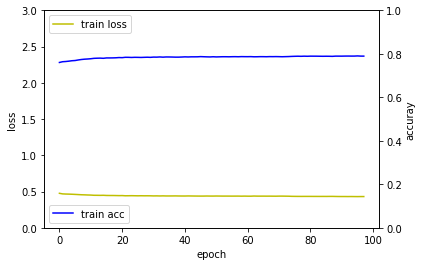

In [25]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [26]:
# Submission1 Random Forest Classifier

forest = RandomForestClassifier(n_estimators = 700, n_jobs = -1, max_depth = 10)
%time forest = forest.fit(X, Y)
Y_pred = forest.predict(X_test)

CPU times: user 1min 36s, sys: 77.4 ms, total: 1min 36s
Wall time: 13 s


In [27]:
forest.score(X, Y)

0.4639760930131208

In [28]:
submission1 = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission1 = pd.concat([test_acc_id, pd.DataFrame(submission1, columns=['label'])], axis=1)
submission1.to_csv('./submission1.csv', index=False)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
submission1

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,2month
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,2month
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,2month
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,2month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,2month
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,2month
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,2month
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,2month


In [30]:
pd.merge(submission, submission1, on='acc_id')

,acc_id,label_x,label_y
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained,2month
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained,2month
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained,2month
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,retained,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,week,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained,2month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained,2month
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained,2month
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained,2month
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained,2month


In [31]:
# Submission2 KNN

neigh = KNeighborsClassifier(n_neighbors=3)
%time neigh = neigh.fit(X, Y)
Y_pred = neigh.predict(X_test)

CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 1.31 s


In [32]:
neigh.score(X, Y)

0.70737287739887

In [33]:
submission2 = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission2 = pd.concat([test_acc_id, pd.DataFrame(submission2, columns=['label'])], axis=1)
submission2.to_csv('./submission2.csv', index=False)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
submission2

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,week
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,2month
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,week
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,retained
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,week
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,2month
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,week
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,week
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,2month


In [35]:
pd.merge(submission1, submission2, on='acc_id')

,acc_id,label_x,label_y
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,2month,week
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,2month,2month
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,2month,week
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month,retained
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,2month,week
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,2month,2month
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,2month,week
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,2month,week
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,2month,2month
